# Binary Classification with a Bank Dataset

In [ ]:
"""@misc{playground-series-s5e8,
    author = {Walter Reade and Elizabeth Park},
    title = {Binary Classification with a Bank Dataset},
    year = {2025},
    howpublished = {\url{https://kaggle.com/competitions/playground-series-s5e8}},
    note = {Kaggle}
}"""

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # graph plots

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk('../data/playground-series-s5e8/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../data/playground-series-s5e8/test.csv
../data/playground-series-s5e8/train.csv
../data/playground-series-s5e8/sample_submission.csv


In [2]:
train = pd.read_csv('../data/playground-series-s5e8/train.csv')
test = pd.read_csv('../data/playground-series-s5e8/test.csv')
sample_submission = pd.read_csv('../data/playground-series-s5e8/sample_submission.csv')

In [3]:
print(train.shape)
print(test.shape)
print(sample_submission.shape)

(750000, 18)
(250000, 17)
(250000, 2)


In [4]:
display(train.head())
display(test.head())

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


## Missing values

In [5]:
train.isna().sum() / train.shape[0]

id           0.0
age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [6]:
test.isna().sum() / test.shape[0]

id           0.0
age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
dtype: float64

## EDA

### Target

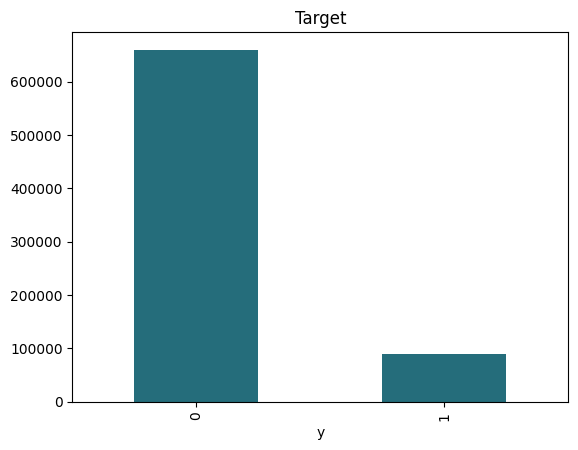

In [7]:
train['y'].value_counts().plot(kind='bar', color='#256D7B')
plt.title("Target")
plt.show()

### Discrete variables

In [8]:
var_disc = train.select_dtypes(include='object')

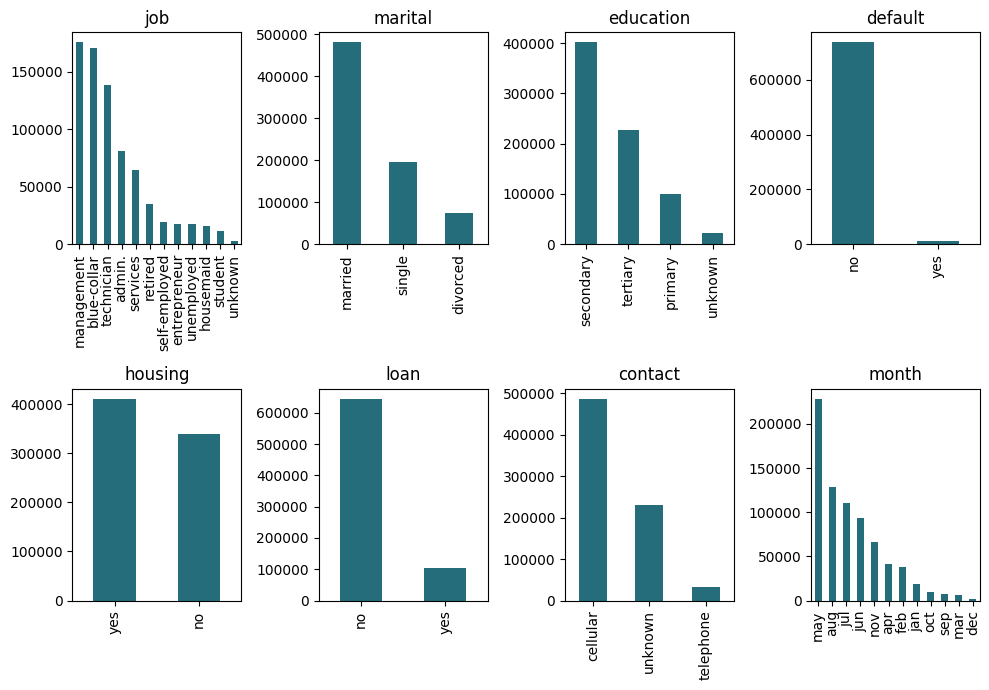

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

var_disc = var_disc

# Suponiendo que tienes hasta 8 variables en var_disc
fig, axes = plt.subplots(2, 4, figsize=(10, 7))  # 4 filas, 2 columnas
axes = axes.flatten()  # Para poder iterar fácilmente

# Iteramos sobre las variables y ejes
for i, var in enumerate(var_disc):
    if i >= 8:  # Por si hay más de 8 variables, ignora el resto
        break
    ax = axes[i]
    train[var].value_counts().plot(kind='bar', color='#256D7B', ax=ax)
    ax.set_title(f'{var}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Eliminar ejes no usados (si hay menos de 8 variables)
for j in range(len(var_disc), 8):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

In [10]:
def preprocessin_cat_cols(df_train: pd.DataFrame, df_test: pd.DataFrame):
    
    from sklearn.preprocessing import LabelEncoder

    train_cat_cols = df_train.select_dtypes(include='object').columns.to_list()
    test_cat_cols = df_test.select_dtypes(include='object').columns.to_list()

    # Validate columns are the same
    assert train_cat_cols == test_cat_cols, "Train and test columns do not match!"

    for col in train_cat_cols:
        le = LabelEncoder()
        le.fit(pd.concat([df_train[col], df_test[col]], axis=0).astype(str))
        df_train[col] = le.transform(df_train[col].astype(str))
        df_test[col] = le.transform(df_test[col].astype(str))

    return df_train, df_test

train, test = preprocessin_cat_cols(train, test)

In [11]:
train.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,9,1,1,0,7,0,0,0,25,1,117,3,-1,0,3,0
1,1,38,1,1,1,0,514,0,0,2,18,6,185,1,-1,0,3,0
2,2,36,1,1,1,0,602,1,0,2,14,8,111,2,-1,0,3,0
3,3,27,8,2,1,0,34,1,0,2,28,8,10,2,-1,0,3,0
4,4,26,9,1,1,0,889,1,0,0,3,3,902,1,-1,0,3,1


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   id         750000 non-null  int64
 1   age        750000 non-null  int64
 2   job        750000 non-null  int64
 3   marital    750000 non-null  int64
 4   education  750000 non-null  int64
 5   default    750000 non-null  int64
 6   balance    750000 non-null  int64
 7   housing    750000 non-null  int64
 8   loan       750000 non-null  int64
 9   contact    750000 non-null  int64
 10  day        750000 non-null  int64
 11  month      750000 non-null  int64
 12  duration   750000 non-null  int64
 13  campaign   750000 non-null  int64
 14  pdays      750000 non-null  int64
 15  previous   750000 non-null  int64
 16  poutcome   750000 non-null  int64
 17  y          750000 non-null  int64
dtypes: int64(18)
memory usage: 103.0 MB


### Continous variables

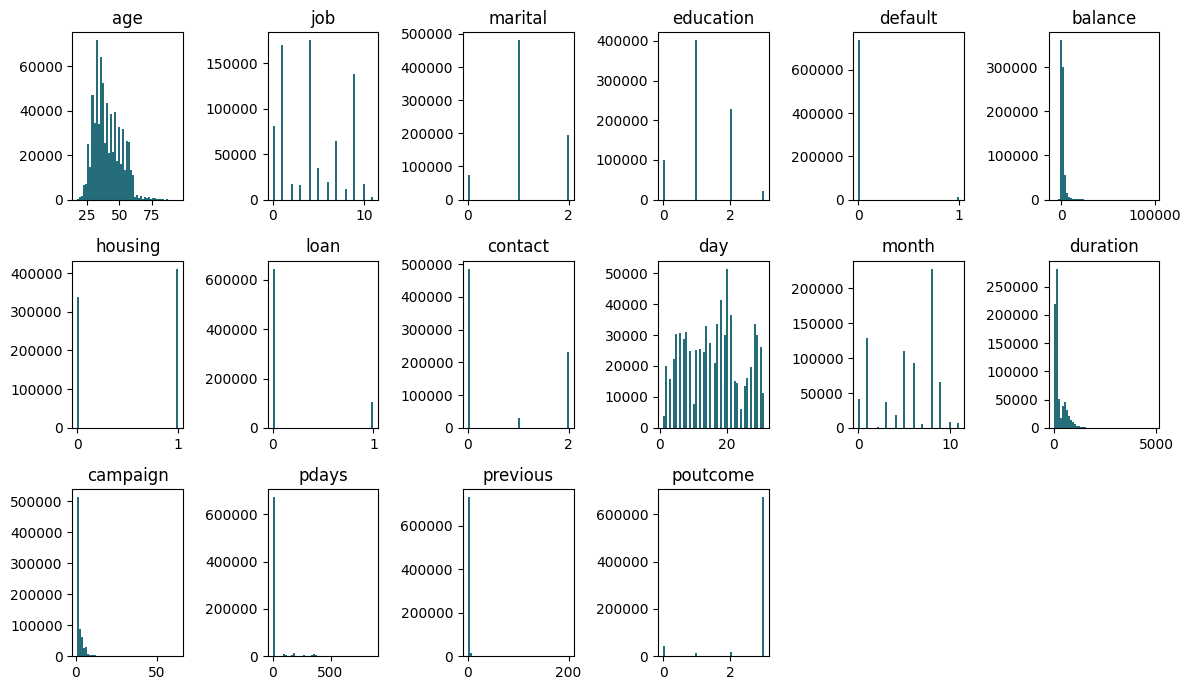

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

var_cont = [_ for _ in train.columns.to_list() if _ not in ['id', 'y']]

# Suponiendo que tienes hasta 8 variables en var_disc
fig, axes = plt.subplots(3, 6, figsize=(12, 7))  # 4 filas, 2 columnas
axes = axes.flatten()  # Para poder iterar fácilmente

# Iteramos sobre las variables y ejes
for i, var in enumerate(var_cont):
    if i >= 18:  # Por si hay más de 8 variables, ignora el resto
        break
    ax = axes[i]
    train[var].plot(kind='hist', 
                    color='#256D7B', 
                    bins=50,
                    ax=ax)
    ax.set_title(f'{var}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Eliminar ejes no usados (si hay menos de 20 variables)
for j in range(len(var_cont), 18):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Bivariate Analysis

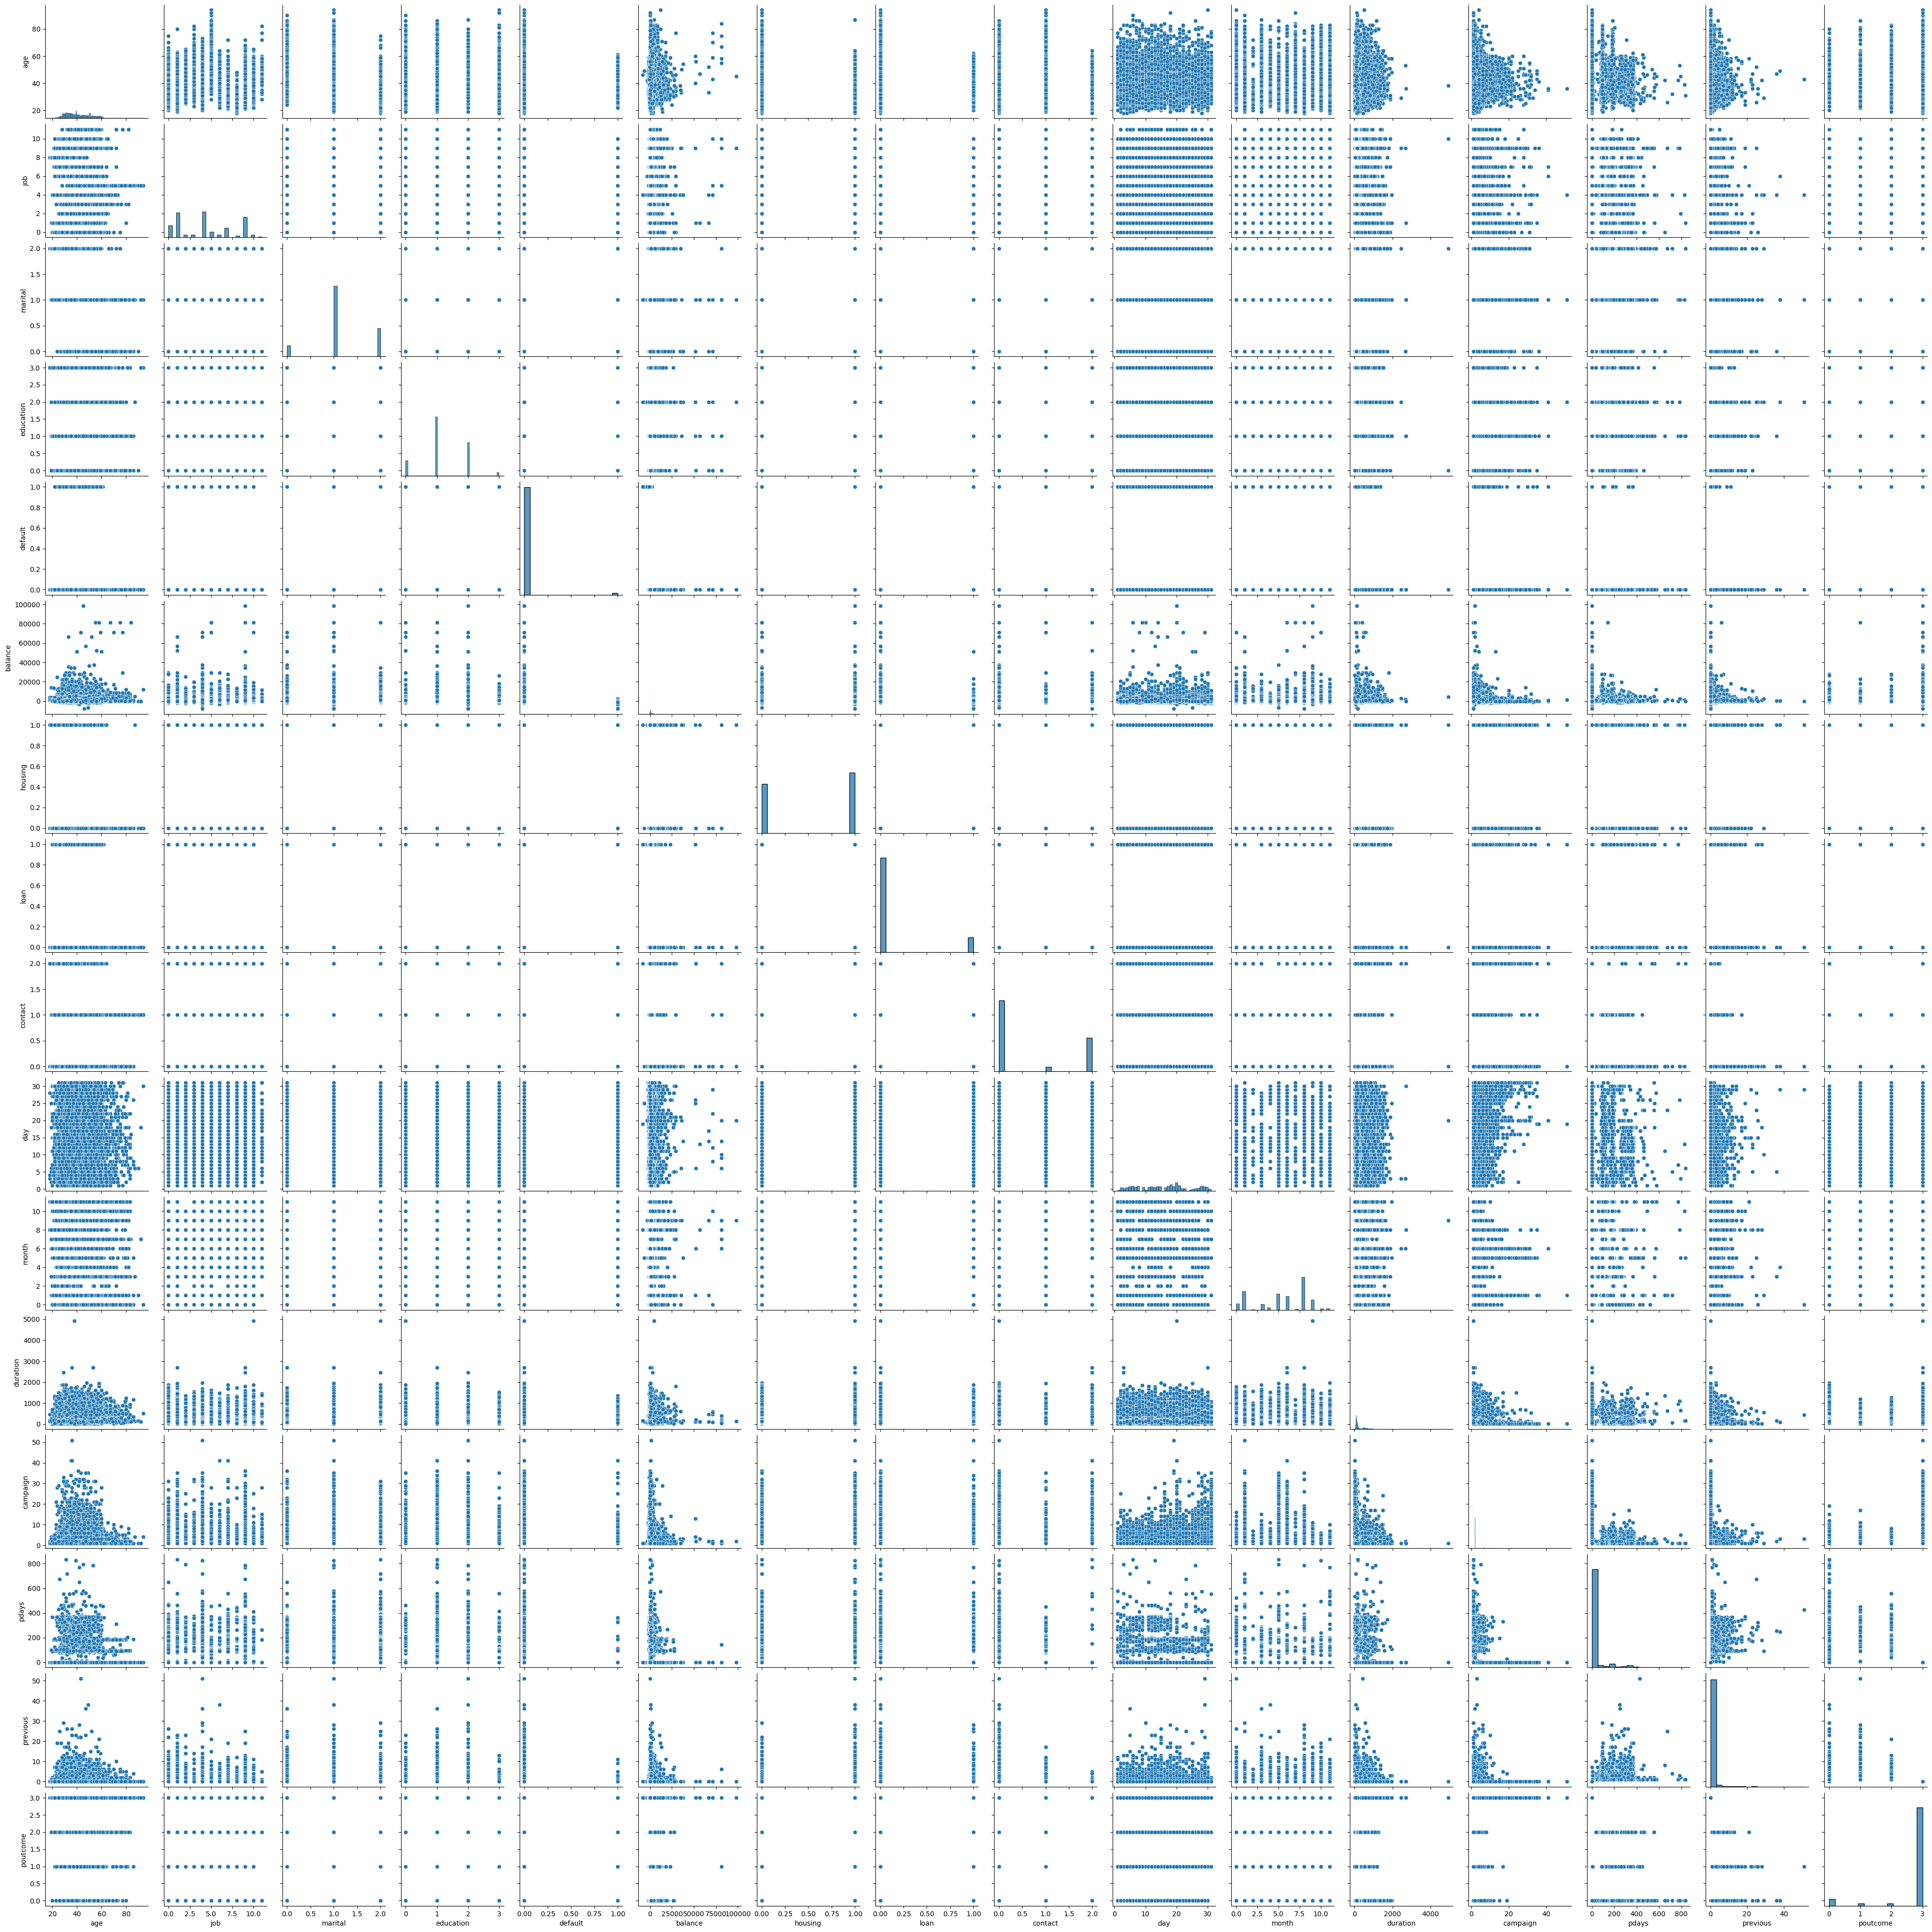

In [14]:
import seaborn as sns

sns.pairplot(train[var_cont].sample(20000))
plt.show()

## Modeling

### XGBoost

In [35]:
import xgboost as xgb; xgb.__version__

'3.0.4'

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [63]:
#getting names of columns
feature_columns = [_ for _ in list(train.columns.values) if _ not in ['id', 'y']]
feature_columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [ ]:
# Features / Target
X = train.drop(['y', 'id'], axis=1)
y = train['y']

In [69]:
#split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.2,
                                                    random_state=1502)

In [70]:
print("X_train :" , X_train.shape)
print("X_tests :" , X_test.shape)
print("y_train :" , y_train.shape)
print("y_tests :" , y_test.shape)

X_train : (600000, 16)
X_tests : (150000, 16)
y_train : (600000,)
y_tests : (150000,)


In [71]:
#create xgboost matrices
Train = xgb.DMatrix(X_train, label=y_train, feature_names=feature_columns)
Test = xgb.DMatrix(X_test, label=y_test, feature_names=feature_columns)

In [73]:
#set the parameters
parameters = {'learning_rate': 0.3,
               'max_depth': 2,
               'colsample_bytree': 1,
               'subsample': 1,
               'min_child_weight': 1,
               'gamma': 0, 
               'random_state': 1502,
               'eval_metric': "auc",
               'objective': "binary:logistic"}

In [75]:
#run XGBoost
model = xgb.train(params = parameters,
                   dtrain = Train,
                   num_boost_round = 200,
                   evals = [(Test, "Yes")],
                   verbose_eval = 50)

[0]	Yes-auc:0.87144
[50]	Yes-auc:0.95194
[100]	Yes-auc:0.95693
[150]	Yes-auc:0.95894
[199]	Yes-auc:0.96017


In [76]:
#Predictions
predictions = model.predict(Test)
predictions = np.where(predictions > 0.5, 1, 0)

In [77]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

report = classification_report(y_test, predictions)
print(report)

[[128374   3577]
 [  6970  11079]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    131951
           1       0.76      0.61      0.68     18049

    accuracy                           0.93    150000
   macro avg       0.85      0.79      0.82    150000
weighted avg       0.93      0.93      0.93    150000



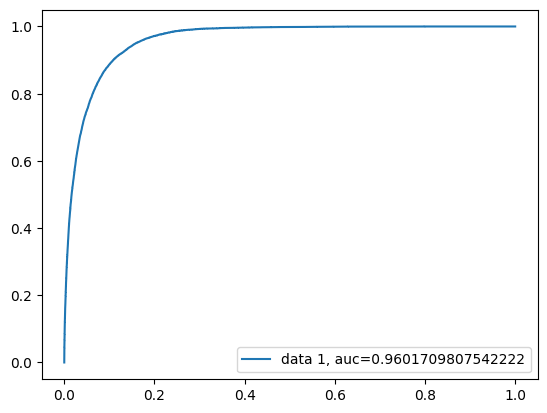

In [87]:
fpr, tpr, _ = roc_curve(y_test,  model.predict(Test))
auc = roc_auc_score(y_test, model.predict(Test))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

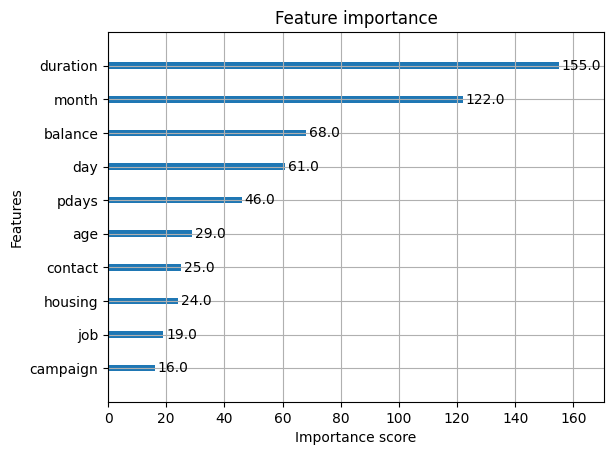

In [80]:
# Plot importance
xgb.plot_importance(model, max_num_features=10)
plt.show()

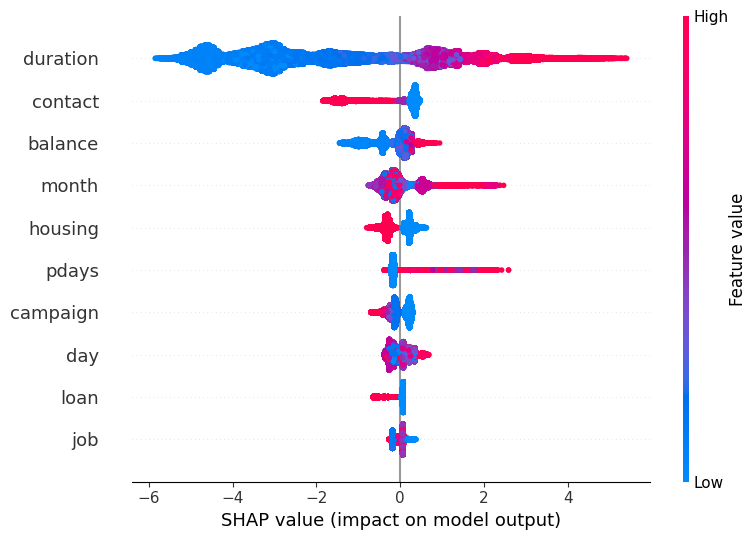

In [79]:
# SHAP
import shap

explainer = shap.TreeExplainer(model=model)
shap_values = explainer.shap_values(X_test)

# SHAP ploting
shap.summary_plot(shap_values,
                  X_test,
                  feature_names = feature_columns,
                  max_display = 10)

In [93]:
dtest = xgb.DMatrix(test[feature_columns])
y_pred_proba = model.predict(dtest)  # devuelve probabilidades

In [98]:
submission = pd.DataFrame({
     "id": range(750000, 750000 + len(y_pred_proba)),
     "y": y_pred_proba
})

In [99]:
submission

,id,y
0,750000,0.007534
1,750001,0.069135
2,750002,0.000747
3,750003,0.000123
4,750004,0.097421
...,...,...
249995,999995,0.000252
249996,999996,0.155238
249997,999997,0.692359
249998,999998,0.002323


In [ ]:
submission.to_csv("submission_4.csv", index=False)